# Homework 1 - Spam Filter Learning Algorithm

Brennan McFarland  
bfm21

# Problem Description

A spam filter attempts to flag messages as spam based on the number of "target words", ie, the number of words likely to appear only in a spam message, it contains.  Based on the number of these target words it finds in a given message, it attempts to estimate the probability that the message is spam using Bayes Rule.  To do this, however, the filter must have an estimate of the probability of a given number of target words given whether the message is spam.  Estimating this probability for all numbers of target words is the problem.

# Random Variables

W represents the number of target words in the message  
    W is a multi-value variable defined for all positive integers  
S represents whether the message is spam  
    S is a binary variable  

# Probabilities

We want P(W|S), the posterior and hidden representation, the probability of a given number of target words given whether the message is spam.  
P(S|W) is our likelihood, the probability of a given message being spam given a certain number of target words.  
P(W) is our prior, the probability of a given number of target words in any given message.
P(S) is our normalizing constant, the probability that any given message is spam.

# Values

Suppose P(S)= 0.3
Suppose P(S|W)=1-1/(W+1).  This way, the probability the message is spam increases with the number of target words found and is in [0,1]
Let P(W) follow the binomial distribution with n= 10 and p= 0.6 .  Setting n to this value means that we are unlikely to find messages with more than  10 spam words to the point that the probability is rounded off to 0.  Also seeing as W represents the number of spam words it would not make sense to have it less than 0.


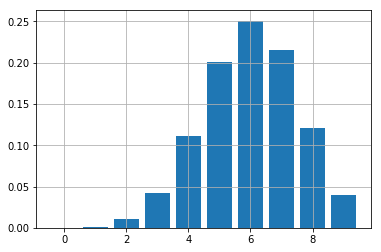

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy


p_s = .3
print("Suppose P(S)=", p_s)

def p_s_given_w(w):
    return 1.0-1.0/(w+1)
print("Suppose P(S|W)=1-1/(W+1).  This way, the probability the message is spam increases with the number of target \
words found and is in [0,1]")


n = 10
p = .6
# TODO: fix this
def p_w(w):
    if(w < 0 or w > n):
       return 0
    return float(math.factorial(n))/float(math.factorial(n-w)*math.factorial(w))*(p**w)*((1-p)**(n-w))
print("Let P(W) follow the binomial distribution with n=", n, "and p=", p, ".  Setting n to this value means that we are \
unlikely to find messages with more than ", n, "spam words to the point that the probability is rounded off to 0.  Also \
seeing as W represents the number of spam words it would not make sense to have it less than 0.")
pltrg = 3 # plot range
x = range(0, n)
y = [p_w(w) for w in x]
plt.bar(x, y)
plt.grid()
plt.show()

In this way, for each value of W a random datum on \[0,1\] is generated from the normal distribution for P(W), which in combination with the likelihood and normalizing constant yields our posterior distribution.

# Calculating the Posterior

Calculating the posterior, P(W|S), is a simple application of Bayes rule:  
P(W|S)=P(S|W)P(W)/P(S)

# Example Data

Suppose we want to calculate the values of P(W|S) for W=3, 4, 5, 0, and 16 (the last two to test edge cases).  A simple application of Bayes rule yields:

In [48]:
def p_w_given_s(w):
    return p_s_given_w(w)*p_w(w)/p_s


def display_p_w_given_s(w):
    print("for W =", w)
    print("P(W|S)=P(S|W)P(W)/P(S)")
    print("= (", p_s_given_w(w), ")(", p_w(w), ")/(",p_s, ")")
    print("= ", p_w_given_s(w))


display_p_w_given_s(0)
display_p_w_given_s(3)
display_p_w_given_s(4)
display_p_w_given_s(5)
display_p_w_given_s(16)

for W = 0
P(W|S)=P(S|W)P(W)/P(S)
= ( 0.0 )( 0.00010485760000000006 )/( 0.3 )
=  0.0
for W = 3
P(W|S)=P(S|W)P(W)/P(S)
= ( 0.75 )( 0.042467328000000006 )/( 0.3 )
=  0.10616832000000002
for W = 4
P(W|S)=P(S|W)P(W)/P(S)
= ( 0.8 )( 0.11147673600000003 )/( 0.3 )
=  0.29727129600000013
for W = 5
P(W|S)=P(S|W)P(W)/P(S)
= ( 0.8333333333333334 )( 0.20065812480000003 )/( 0.3 )
=  0.5573836800000002
for W = 16
P(W|S)=P(S|W)P(W)/P(S)
= ( 0.9411764705882353 )( 0 )/( 0.3 )
=  0.0


Calculating the posterior for the entire distribution of P(W) is visualized in the graph below:

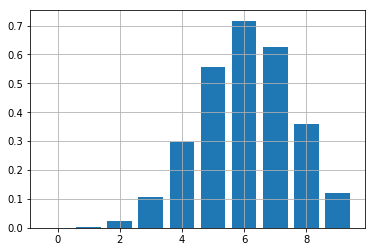

In [49]:
#TODO: shouldn't this add to 1?
x = range(0, n)
y = [p_w_given_s(w) for w in x]
plt.bar(x, y)
plt.grid()
plt.show()

But we can get more accurate results by taking the average of multiple samples for P(W), since it is randomly distributed:

In [21]:
def average_p_w_given_s(w):
    average_p_w = (p_w(w) + p_w(w) + p_w(w))/3.0
    print("for W =", w)
    print("P(W|S)=P(S|W)P(W)/P(S)")
    print("= (", p_s_given_w(w), ")(", average_p_w, ")/(",p_s, ")")
    print("= ", p_s_given_w(w)*average_p_w/p_s)


average_p_w_given_s(0)
average_p_w_given_s(3)
average_p_w_given_s(4)
average_p_w_given_s(5)
average_p_w_given_s(16)

for W = 0
P(W|S)=P(S|W)P(W)/P(S)
= ( 0.0 )( 8.09991095609e-06 )/( 0.3 )
=  0.0
for W = 3
P(W|S)=P(S|W)P(W)/P(S)
= ( 0.75 )( 0.00132856284398 )/( 0.3 )
=  0.00332140710994
for W = 4
P(W|S)=P(S|W)P(W)/P(S)
= ( 0.8 )( 0.00487489121613 )/( 0.3 )
=  0.0129997099097
for W = 5
P(W|S)=P(S|W)P(W)/P(S)
= ( 0.8333333333333334 )( 0.0146449825619 )/( 0.3 )
=  0.0406805071165
for W = 16
P(W|S)=P(S|W)P(W)/P(S)
= ( 0.9411764705882353 )( 0.00487489121613 )/( 0.3 )
=  0.0152937763643
